In [1]:
import qt
from qt import dt, np, pd

import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(1)

In [3]:
N = int(1e6)
T = int(N/2)
K = 100
kk = range(1,K+1)

In [4]:
signal2noise = 0.003
coefs = np.random.normal(size=K)
coefs = coefs[np.argsort(-np.abs(coefs))]  # sort by abs value

In [5]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

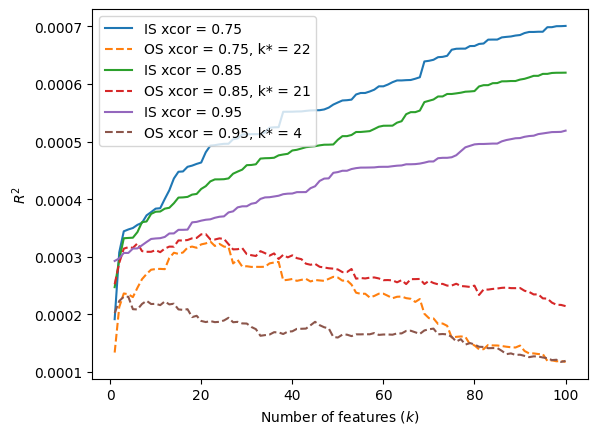

In [ ]:
for xcor in [0.75, 0.85, 0.95]:
# for xcor in [0.75]:

	# covariance matrix
	cov = (1-xcor) * np.diag(np.ones(K)) + xcor * np.ones((K,K))	# sets variance to 1 and each covariance to xcor

	# generate data
	X = np.random.multivariate_normal(mean=np.zeros(K), cov=cov, size=(N))

	# noisy response
	y = signal2noise*X@coefs
	y += np.random.normal(size=N)

	# r^2 using first i features for in sample and out of sample
	is_r2 = np.zeros(K+1)
	os_r2 = np.zeros(K+1)

	# run regression for 1 to i features
	for i in range(1,K+1):
		X_train, X_test = X[:T, :i], X[T:N, :i]
		y_train, y_test = y[:T], y[T:N]

		# train regression model
		lin_reg = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)

		# in sample r^2
		is_r2[i] = lin_reg.score(X_train, y_train)
		os_r2[i] = lin_reg.score(X_test, y_test)

	plt.plot(kk, is_r2[1:], '--', label=f'IS xcor = {xcor}');
	plt.plot(kk, os_r2[1:], '-', label=f'OS xcor = {xcor}, k* = {np.argmax(os_r2)}');

plt.xlabel("Number of features ($k$)");
plt.ylabel(r"$R^2$");
plt.legend();
plt.show();